In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Kaggle Contest/Playground Series. February 21.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
!unzip -q "/content/drive/My Drive/Kaggle Contest/Playground Series. February 21.zip" -d "/content/drive/My Drive/Kaggle Contest/NewFolder"

replace /content/drive/My Drive/Kaggle Contest/NewFolder/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pip install colorama
!pip install optuna
!pip install shap


     |████████████████████████████████| 296kB 17.6MB/s 
     |████████████████████████████████| 81kB 13.8MB/s 
     |████████████████████████████████| 1.2MB 57.2MB/s 
     |████████████████████████████████| 112kB 53.1MB/s 
     |████████████████████████████████| 143kB 45.5MB/s 
     |████████████████████████████████| 51kB 10.1MB/s 
     |████████████████████████████████| 481kB 57.9MB/s 
  Created wheel for alembic: filename=alembic-1.5.5-py2.py3-none-any.whl size=156597 sha256=19e5586444d27d4c17efcf098947a39eebde9972cf5743d951ce6c07717c76ed
  Stored in directory: /root/.cache/pip/wheels/74/3f/61/7de6e3cef766d2680a5d81b1a388286e640f6a681eb589d643
  Created wheel for Mako: filename=Mako-1.1.4-py2.py3-none-any.whl size=75675 sha256=a40f796ff6d02b0e9e5988a1d89f4146bfcab46358ee995b7cdb1cc4856bac93
  Stored in directory: /root/.cache/pip/wheels/ad/10/d3/aeb26e20d19045e2a68e5d3cbb57432e11b5d9c92c99f98d47
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha2

In [ ]:
import numpy as np 
import pandas as pd 
import re
import sys, gc, os
from IPython.display import display

from scipy import stats

import shap
shap.initjs()

import urllib.request
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline
import matplotlib.pyplot as plt
from colorama import Fore
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn import metrics
from scipy import stats
import math
import numpy as np
import pandas as pd
sns.set_style('whitegrid')


from tqdm.notebook import tqdm
from copy import deepcopy

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import optuna
from optuna import Trial, visualization

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
train_df = pd.read_csv('/content/drive/My Drive/Kaggle Contest/NewFolder/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/Kaggle Contest/NewFolder/test.csv')
sub_df = pd.read_csv('/content/drive/My Drive/Kaggle Contest/NewFolder/sample_submission.csv')

check for missing values

In [ ]:
train_df.isnull().sum()


In [ ]:
feature_cols = train_df.drop(['id', 'target'], axis=1).columns

In [ ]:
train_df[feature_cols]
numerical_columns = train_df[feature_cols].select_dtypes(include=['int64','float64']).columns
categorical_columns = train_df[feature_cols].select_dtypes(exclude=['int64','float64']).columns
#train_df[numerical_columns]

print("Null values in continuos variables:{}\nNull values in categorical variables:{}"
.format(train_df[numerical_columns].isna().sum().sum(),
        train_df[categorical_columns].isna().sum().sum()))
#A way to check if our features have Null values
train_indexs = train_df.index
test_indexs = test_df.index
df =  pd.concat(objs=[train_df, test_df], axis=0).reset_index(drop=True)
df = df.drop('id', axis=1)

Null values in continuos variables:0
Null values in categorical variables:0


In [ ]:
train_df['target'].skew()

-0.2012646960982302

ebteda maghadir mokhtlef , unique ra baray har fiture dar test va train ra peyda mikonim ta chiz jadidi dar test masalan moshahede nashavad  
dar ebteday kar maghadir har cat feat ra peyda mikonim

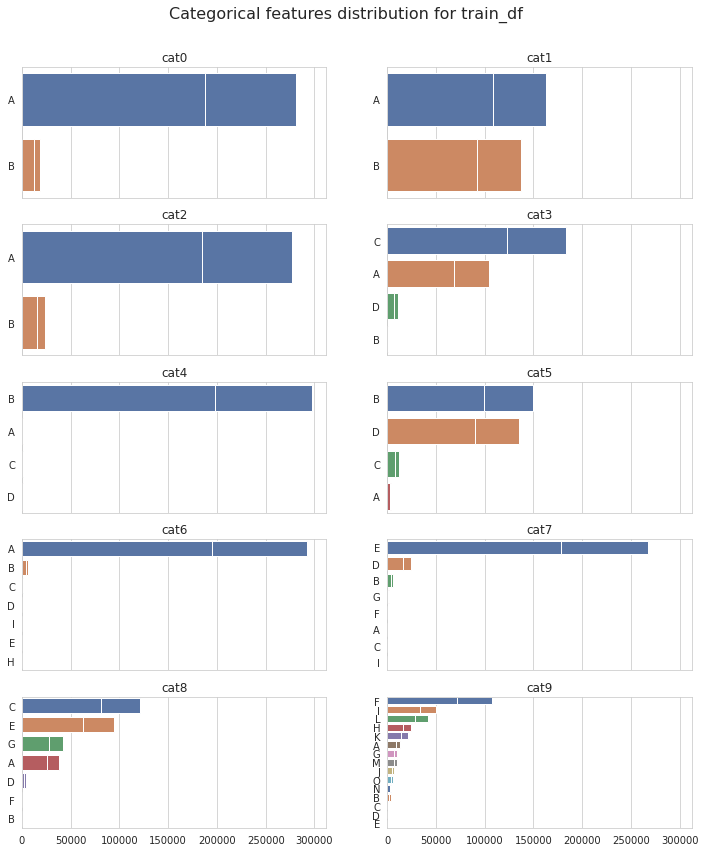

In [ ]:
idx = 0
f, axes = plt.subplots(5, 2, sharex=True, figsize=(12,14))
plt.suptitle('Categorical features distribution for train_df', size=16, y=(0.94))

for row in range(5):
    for col in range(2):
        data = train_df[categorical_columns[idx]].value_counts()
        sns.barplot(x = data.values, y = data.index, palette='deep', ax=axes[row, col])
        data_test = test_df[categorical_columns[idx]].value_counts()
        sns.barplot(x = data_test.values, y = data_test.index, palette='deep', ax=axes[row, col])
        axes[row,col].set_title(categorical_columns[idx])
        idx += 1


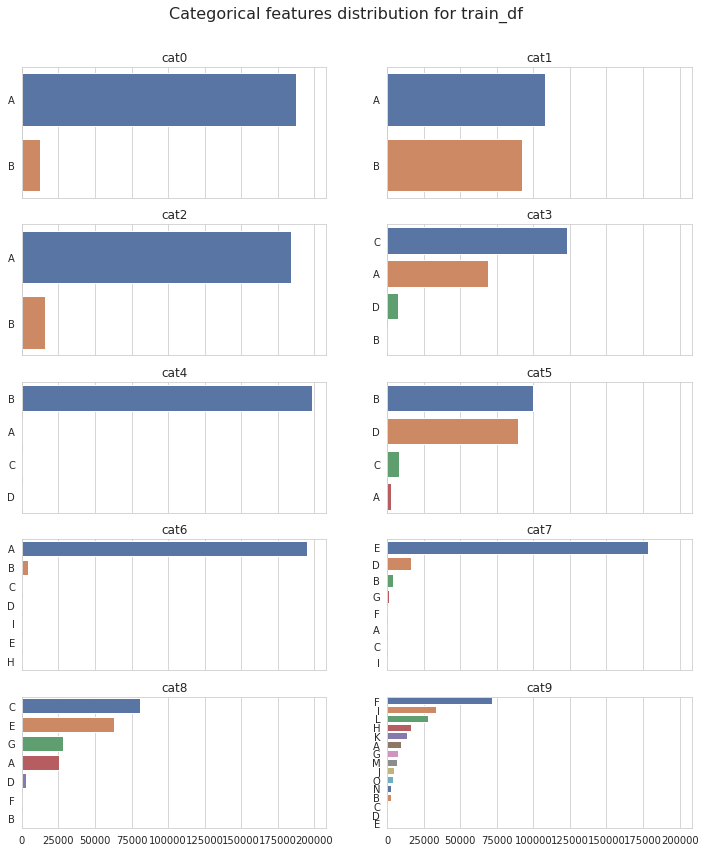

In [ ]:
idx = 0
f, axes = plt.subplots(5, 2, sharex=True, figsize=(12,14))
plt.suptitle('Categorical features distribution for train_df', size=16, y=(0.94))

for row in range(5):
    for col in range(2):
        data = test_df[categorical_columns[idx]].value_counts()
        sns.barplot(x = data.values, y = data.index, palette='deep', ax=axes[row, col])
        axes[row,col].set_title(categorical_columns[idx])
        idx += 1

be nazar miad chon soton hay [cat0 , cat 2 ,cat4 ,cat6, cat7]taghriban hamashon yek meghdar daran etalat zyadi nadaran 

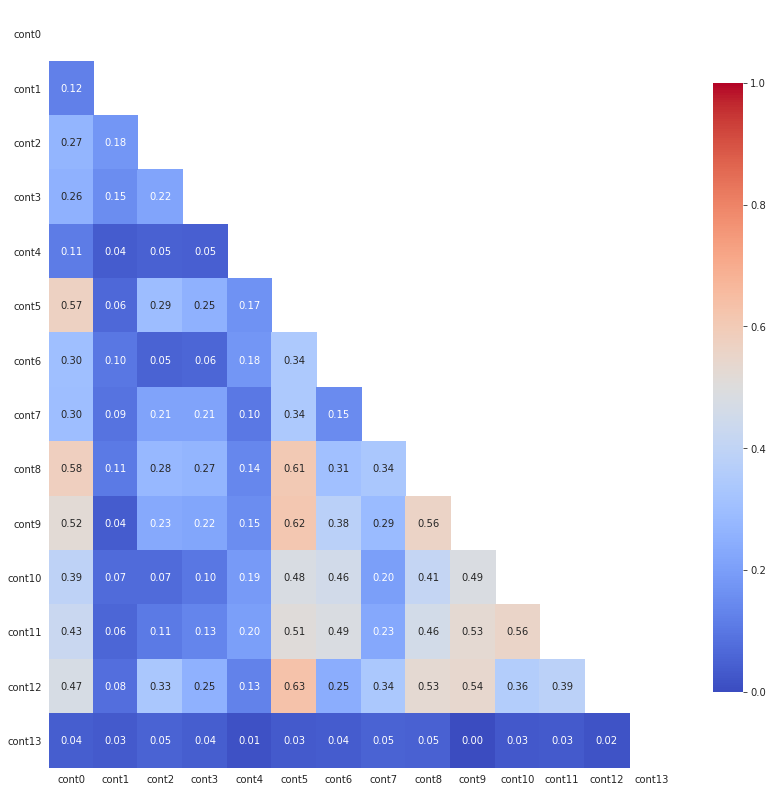

In [ ]:
corr = df[numerical_columns].corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(14, 14))

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8}, vmin=0, vmax=1)
# yticks
plt.yticks(rotation=0)
plt.show()

hal be nazar miad cont 12  ba cont 5 va cont2 rabete khobi darad biaym regrresion plotesh robebinim

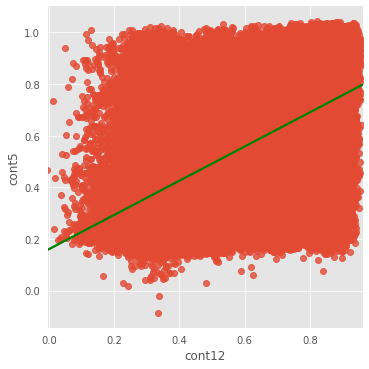

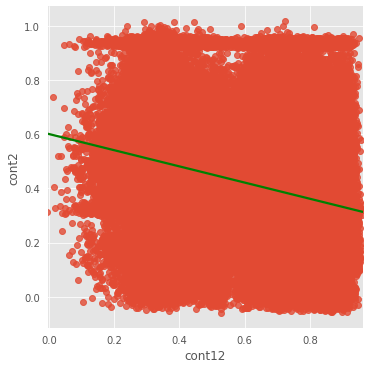

In [ ]:
plt.style.use('ggplot')
sns.lmplot(x='cont12',y='cont5',line_kws={"color":"green"},data=train_df)
sns.lmplot(x='cont12',y='cont2',line_kws={"color":"green"},data=train_df);

na khabar khasi nist:(

hal miravim soragh feature eng ba estefadeh az feature tool

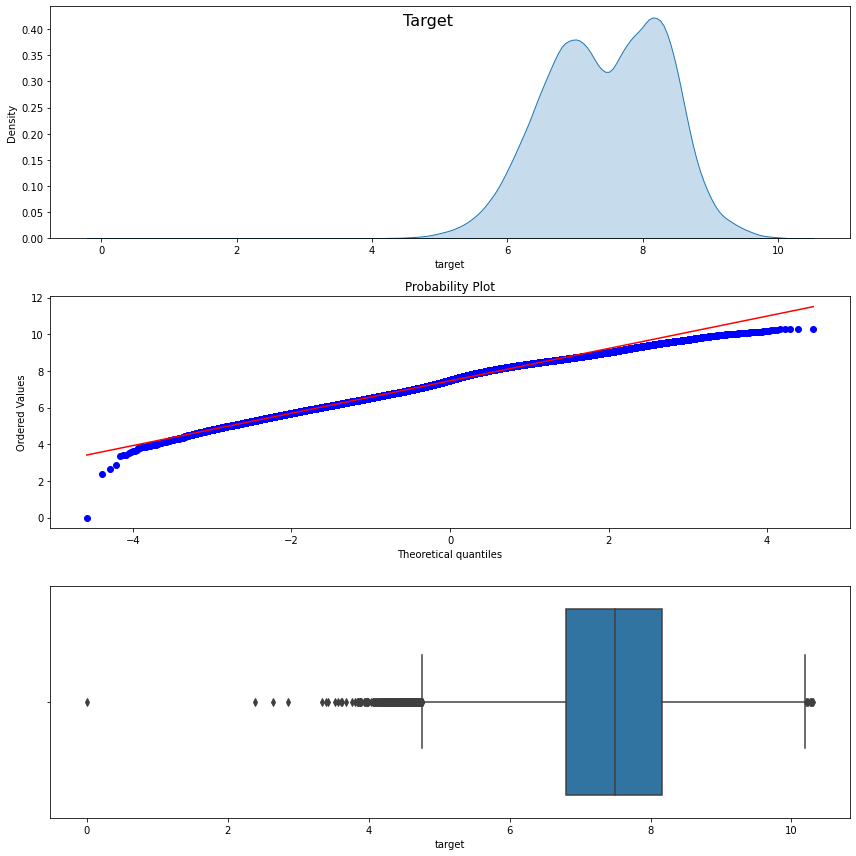

In [ ]:
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

f.suptitle('Target', fontsize=16)
g = sns.kdeplot(train_df['target'], shade=True, label="%.2f"%(train_df['target'].skew()), ax=axes[0])
#g = g.legend(loc="best")
stats.probplot(train_df['target'], plot=axes[1])
sns.boxplot(x='target', data=train_df, orient='h', ax=axes[2]);

plt.tight_layout()
plt.show()

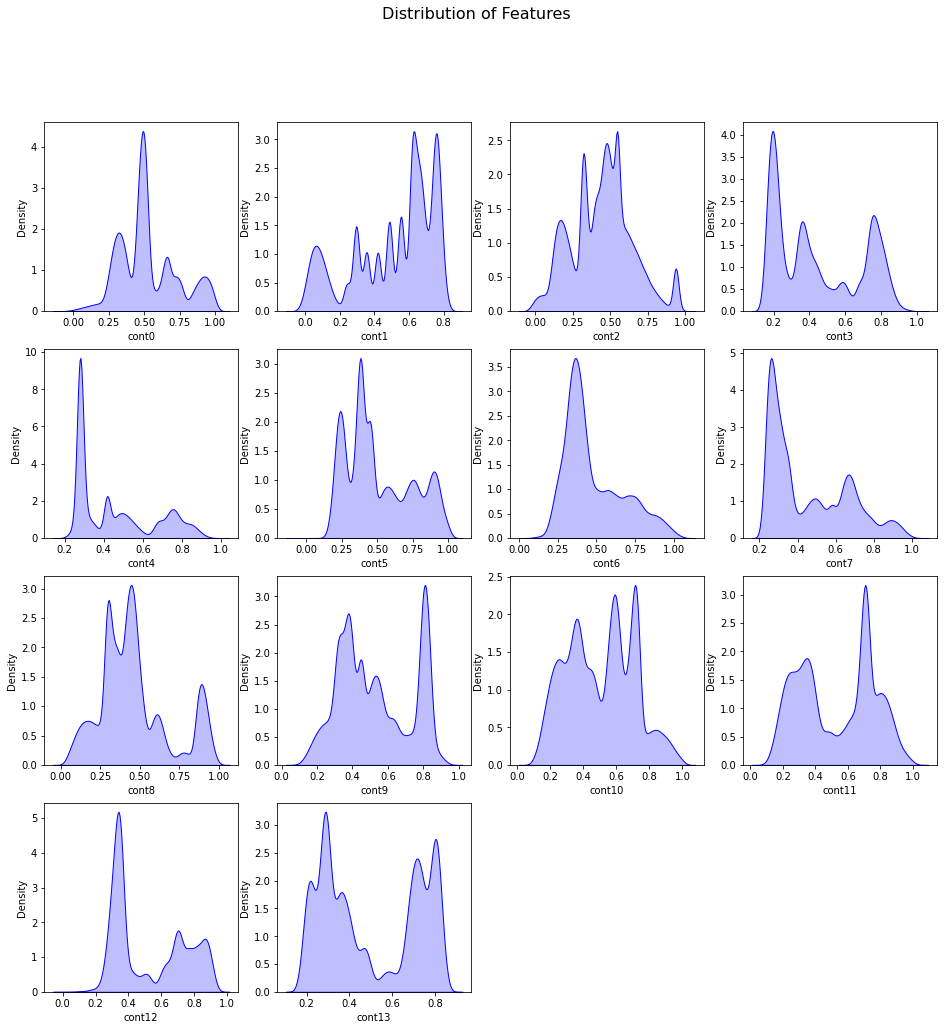

In [ ]:
num_rows, num_cols = 4,4
f, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16,16))
f.suptitle('Distribution of Features', fontsize=16)

for index, column in enumerate(df[numerical_columns].columns):
    i,j = (index // num_cols, index % num_cols)
    g = sns.kdeplot(train_df[column], color="b", shade=True, label="%.2f"%(train_df[column].skew()), ax=axes[i,j])
    #g = g.legend(loc="best")

f.delaxes(axes[3, 2])
f.delaxes(axes[3, 3])
#plt.tight_layout()
plt.show()


In [ ]:
corr_matrix = train_df.corr().abs()
corr_matrix['target'].sort_values(ascending=False)

target    1.000000
cont0     0.039217
cont1     0.036767
cont5     0.025329
cont7     0.023479
cont10    0.021051
cont11    0.020685
cont8     0.019246
cont4     0.015908
cont6     0.015015
cont3     0.005414
cont13    0.004975
cont12    0.003545
cont2     0.001806
id        0.000637
cont9     0.000059
Name: target, dtype: float64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

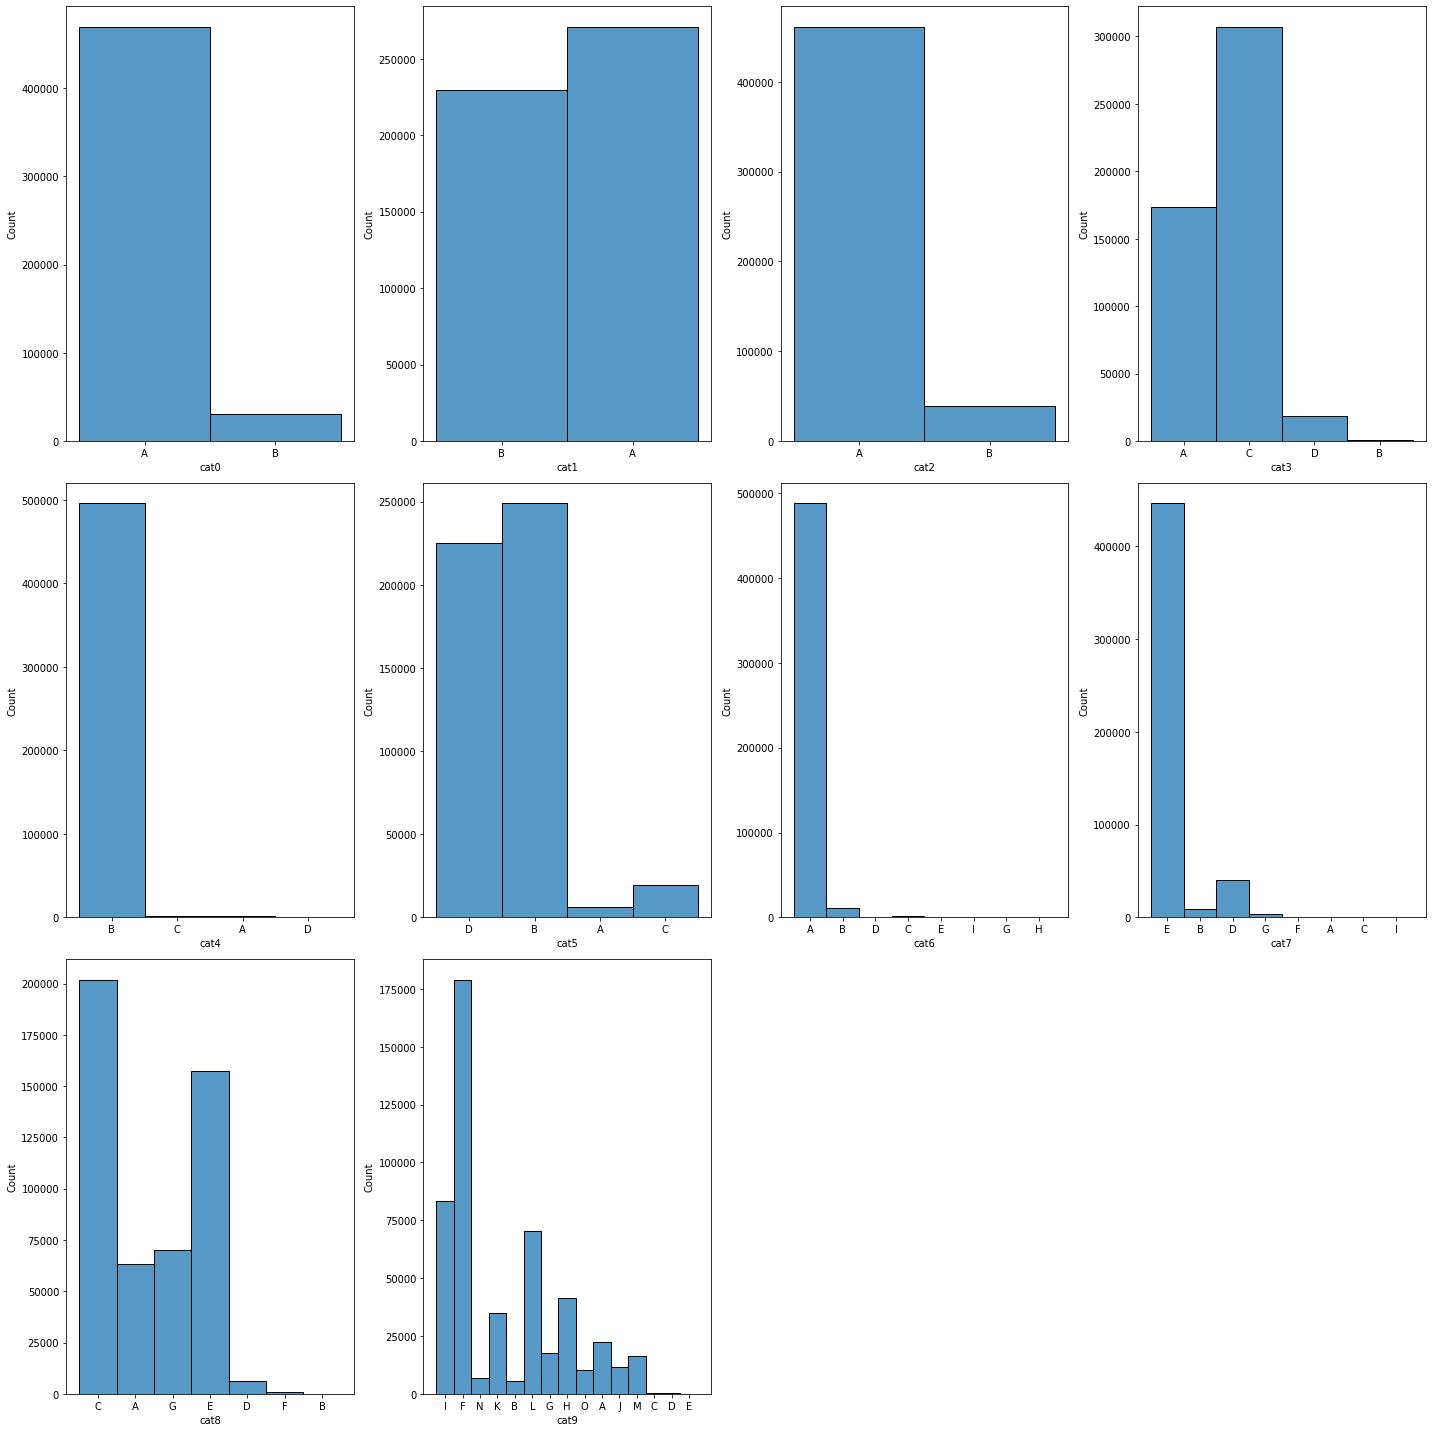

In [ ]:
num_rows, num_cols = 3,4
f, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))

for index, column in enumerate(df[categorical_columns].columns):
    i,j = (index // num_cols, index % num_cols)
    sns.histplot(x=column, data=df, ax=axes[i,j])

f.delaxes(axes[2, 2])
f.delaxes(axes[2, 3])
plt.tight_layout()
plt.show()


In [ ]:
'''a = train_df['cont5'] == 0
print(a.value_counts())'''
for i in range(0,10):
  x = "cat" + str(i)
  print (df[x].value_counts())
for j in range(0,14):  
  y = "cont" + str(j)
  print(df[y].describe())
for j in range(0,14):  
  y = "cont" + str(j)
  z = df[y]== 0
  print(z.value_counts())

A    469171
B     30829
Name: cat0, dtype: int64
A    270725
B    229275
Name: cat1, dtype: int64
A    460810
B     39190
Name: cat2, dtype: int64
C    306937
A    173511
D     18504
B      1048
Name: cat3, dtype: int64
B    495656
A      2024
C      1317
D      1003
Name: cat4, dtype: int64
B    248870
D    224946
C     19708
A      6476
Name: cat5, dtype: int64
A    487800
B     10525
C      1314
D       273
I        40
E        32
H        13
G         3
Name: cat6, dtype: int64
E    445966
D     40716
B      9480
G      3308
F       491
A        26
C         8
I         5
Name: cat7, dtype: int64
C    201795
E    157575
G     70164
A     63312
D      6188
F       942
B        24
Name: cat8, dtype: int64
F    178904
I     83255
L     70258
H     41197
K     34839
A     22529
G     17487
M     16413
J     11659
O     10273
N      6790
B      5742
C       352
D       176
E       126
Name: cat9, dtype: int64
count    500000.000000
mean          0.524638
std           0.204780
min      

In [ ]:
train_df['cont3'].describe()

count    300000.000000
mean          0.446214
std           0.238669
min           0.134760
25%           0.214572
50%           0.377823
75%           0.719758
max           1.006469
Name: cont3, dtype: float64

In [ ]:
def modify_df(df):
    df['cat4'] = df['cat4'].apply(lambda x: x if x == 'B' else 'Z')
    df['cat5'] = df['cat5'].apply(lambda x: x if x in ['B', 'D'] else 'Z')
    df['cat6'] = df['cat6'].apply(lambda x: x if x == 'A' else 'Z')
    df['cat7'] = df['cat7'].apply(lambda x: x if x in ['E', 'D'] else 'Z')
    df['cat8'] = df['cat8'].apply(lambda x: x if x in ['E', 'C', 'G', 'A'] else 'Z')
    
    df['cont001'] = df['cont7'] * df['cont11']
    df['cont002'] = df['cont1'] * df['cont1'] * df['cont1']
    df['cont003'] = df['cont1'] * df['cont1']
    df['cont004'] = df['cont8'] * df['cont1']
    df['cont005'] = df['cont8'] * df['cont1'] * df['cont1']
    df['cont006'] = df['cont1'] * df['cont3']
    df['cont007'] = df['cont13'] * df['cont1']
    df['cont008'] = df['cont1'] * df['cont13'] * df['cont1']
    df['cont009'] = df['cont5'] * df['cont0']
    df['cont010'] = df['cont1'] * df['cont11']
    df['cont011'] = df['cont10'] * df['cont5']
    df['cont012'] = df['cont11'] * df['cont1']*df['cont010']
    df['cont013'] = df['cont0'] * df['cont0']
    df['cont014'] = df['cont1'] * df['cont004']
    df['cont015'] = df['cont1'] * df['cont010']
    df['cont016'] = df['cont1'] * df['cont012']


    return df

In [ ]:
mod_train_df = modify_df(train_df.copy())
mod_test_df = modify_df(test_df.copy())

In [ ]:
corr_matrix_1 = mod_train_df.corr().abs()
corr_matrix_1['target'].sort_values(ascending=False)

target     1.000000
cont004    0.044629
cont010    0.039671
cont0      0.039217
cont005    0.038683
cont014    0.038683
cont012    0.037452
cont1      0.036767
cont015    0.033737
cont016    0.032842
cont007    0.029807
cont001    0.028984
cont003    0.028495
cont009    0.027531
cont013    0.026951
cont008    0.025750
cont5      0.025329
cont006    0.023760
cont7      0.023479
cont002    0.022362
cont011    0.022113
cont10     0.021051
cont11     0.020685
cont8      0.019246
cont4      0.015908
cont6      0.015015
cont3      0.005414
cont13     0.004975
cont12     0.003545
cont2      0.001806
id         0.000637
cont9      0.000059
Name: target, dtype: float64

In [ ]:
for feature in categorical_columns:
    le = LabelEncoder()
    le.fit(train_df[feature])
    train_df[feature] = le.transform(train_df[feature])
    test_df[feature] = le.transform(test_df[feature])

for feature in categorical_columns:
    le = LabelEncoder()
    le.fit(mod_train_df[feature])
    mod_train_df[feature] = le.transform(mod_train_df[feature])
    mod_test_df[feature] = le.transform(mod_test_df[feature])

In [ ]:
x = train_df[feature_cols]
y = train_df['target']

feature_cols_mod = mod_train_df.drop(['id', 'target'], axis=1).columns
xmod, ymod = mod_train_df[feature_cols_mod], mod_train_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
xmod_train, xmod_test, ymod_train, ymod_test = train_test_split(xmod, ymod, test_size=0.275, random_state=42)

In [ ]:
clf = XGBRegressor(random_state=42, tree_method='auto')
XGBRegressor()

clf.fit(x_train, y_train)


[12:30:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, tree_method='auto', verbosity=1)

In [ ]:
clf.fit(xmod_train, ymod_train)

[12:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, tree_method='auto', verbosity=1)

In [ ]:
clf = LGBMRegressor(random_state=42, device='cpu')

clf.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              device='cpu', importance_type='split', learning_rate=0.1,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [ ]:
predictions = clf.predict(x_test)

score_rmse = math.sqrt(mean_squared_error(y_test, predictions))
print(Fore.BLUE + 'Base LGBM RMSE: {}'.format(score_rmse))


Base LGBM RMSE: 0.846464823958779


In [ ]:
clf2 = LGBMRegressor(random_state=42, device='cpu')

clf2.fit(xmod_train, ymod_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              device='cpu', importance_type='split', learning_rate=0.1,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [ ]:
predictions2 = clf2.predict(xmod_test)

score_rmse2 = math.sqrt(mean_squared_error(ymod_test, predictions2))
print(Fore.BLUE + 'Base LGBM RMSE: {}'.format(score_rmse2))


Base LGBM RMSE: 0.8469612027114873


In [ ]:
train_oof = np.zeros((300000,))
test_preds = 0
train_oof.shape

(300000,)

In [ ]:
NUM_FOLDS = 10
kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=0)

for f, (train_ind, val_ind) in tqdm(enumerate(kf.split(x, y))):
        tmp_train_df, tmp_val_df = x.iloc[train_ind][feature_cols], x.iloc[val_ind][feature_cols]
        train_target, val_target = y[train_ind], y[val_ind]
        
        model = LGBMRegressor(random_state=42, device='cpu')
        model.fit(tmp_train_df, train_target, eval_set=[(tmp_val_df, val_target)], verbose=False)
        temp_oof = model.predict(tmp_val_df)
        temp_test = model.predict(test_df[feature_cols])

        train_oof[val_ind] = temp_oof
        test_preds += temp_test/NUM_FOLDS
        
        print(mean_squared_error(temp_oof, val_target, squared=False))


0.8442519159711132
0.8497636470334476
0.8463810211719109
0.8432095504012818
0.8500833449633429
0.8438392409896769
0.8458610425308554
0.8439774260722025
0.8500862520703749
0.8466278053798774



In [ ]:
train_oof = np.zeros((300000,))
test_preds = 0
train_oof.shape

NUM_FOLDS = 5
kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=0)
a = []

for f, (train_ind, val_ind) in tqdm(enumerate(kf.split(xmod, ymod))):
        mod_tmp_train_df, mod_tmp_val_df = xmod.iloc[train_ind][feature_cols_mod], xmod.iloc[val_ind][feature_cols_mod]
        mod_train_target, mod_val_target = ymod[train_ind], ymod[val_ind]
        
        model = LGBMRegressor(reg_alpha = 6.143 , reg_lambda = 0.00243,n_jobs = -1 , random_state=42, device='cpu' ,
                              learning_rate = 0.01 , n_estimators = 30000)
        model.fit(mod_tmp_train_df, mod_train_target, eval_set=[(mod_tmp_val_df, mod_val_target)], verbose= 0)
        mod_temp_oof = model.predict(mod_tmp_val_df)
        mod_temp_test = model.predict(mod_test_df[feature_cols_mod])

        train_oof[val_ind] = mod_temp_oof
        test_preds += mod_temp_test/NUM_FOLDS
        a.append(mean_squared_error(mod_temp_oof, mod_val_target, squared=False))
        print(a[-1])
#b = pd.DataFrame(a)
#b.describe()
sub_df['target'] = test_preds
sub_df.to_csv('submission_lgbm_mod_cv_optimized.csv', index=False)
sub_df.head()

0.8509476313705288
0.8486850746000171
0.8521855434622353
0.8485837751799695
0.8515897168242204



,id,target
0,0,7.565032
1,5,7.718049
2,15,7.548558
3,16,7.382869
4,17,7.377139


In [ ]:
from sklearn.model_selection import cross_val_score
model = LGBMRegressor(random_state=42, device='cpu' , learning_rate = 0.01 , n_estimators = 30000)
scores = cross_val_score(model, xmod, ymod, scoring="neg_mean_squared_error", cv=5 , verbose= 3)
model_scores = np.sqrt(-scores)

def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
display_scores(model_scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................... , score=-0.724, total=15.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 15.9min remaining:    0.0s


[CV] ................................... , score=-0.722, total=15.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 31.8min remaining:    0.0s


[CV] ................................... , score=-0.727, total=16.0min
[CV]  ................................................................
[CV] ................................... , score=-0.724, total=16.1min
[CV]  ................................................................
[CV] ................................... , score=-0.720, total=15.7min
Scores: [0.85084197 0.84991495 0.85241403 0.8509977  0.8485565 ]
Mean: 0.8505450322276701
Standard deviation: 0.0012757319646883424


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 79.5min finished


In [ ]:
!pip install scitime
import time
import scitime 
from scitime import Estimator 
estimator = Estimator()
km = KMeans()

# generating inputs for this example
X = np.random.rand(100000,10)
# run the estimation
estimation, lower_bound, upper_bound = estimator.time(km, X)

"estimator = Estimator(meta_algo='RF', verbose=3)\nkm = KMeans()\n\n# generating inputs for this example\nX = np.random.rand(100000,10)\n# run the estimation\nestimation, lower_bound, upper_bound = estimator.time(km, X)"

In [ ]:
lgbm_params = {
    "random_state": 43,
    "metric": "rmse",
    "n_jobs": -1,
    "colsample_bytree": 0.3,
    "learning_rate": 0.01,
    "max_depth": 30,
    "n_estimators": 30000,
    "bagging_freq": 1,
    "bagging_fraction": 0.7,
}
modelX = LGBMRegressor(**lgbm_params)
scores = cross_val_score(modelX, xmod, ymod, scoring="neg_mean_squared_error", cv=5 , verbose= 2)
model_scores = np.sqrt(-scores)
display_scores(model_scores)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
scores2 = cross_val_score(model2, xmod, ymod, scoring="neg_mean_squared_error", cv=5)
model_scores2 = np.sqrt(-scores2)

display_scores(model_scores2)



In [ ]:
model3 = Lasso()
scores = cross_val_score(model3, xmod, ymod, scoring="neg_mean_squared_error", cv=5)
model_scores = np.sqrt(-scores)

display_scores(model_scores)

Scores: [0.88540195 0.88831376 0.88774907 0.88829305 0.8867074 ]
Mean: 0.8872930472013462
Standard deviation: 0.0011107694381211498


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'alpha': [0.00025, 0.001, 0.004], 'fit_intercept': [True,False],'max_iter':[1000,2000],
 'tol':[0.0004, 0.0016 , 0.0032] , 'selection' : ['random','cyclic'], 'normalize' : [True,False]},
]
'''
alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True,
max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic'
'''
grid_search = GridSearchCV(model3, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(xmod, ymod)

In [ ]:
grid_search.best_params_

{'alpha': 0.004,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'selection': 'random',
 'tol': 0.0004}

In [ ]:
best_params = {
    'alpha': 0.001,
    'fit_intercept': True,
    'max_iter': 1000,
    'normalize': False,
    'selection': 'random',
    'tol': 0.0004
}

model4 = Lasso(**best_params)
scores = cross_val_score(model4, xmod, ymod, scoring="neg_mean_squared_error", cv=5)
model_scores = np.sqrt(-scores)

display_scores(model_scores)

Scores: [0.86728958 0.86985433 0.86988665 0.86951374 0.86791374]
Mean: 0.8688916070571384
Standard deviation: 0.0010795114530815165


In [ ]:
model5 = Lasso(alpha = 0.001)
scores = cross_val_score(model5, xmod, ymod, scoring="neg_mean_squared_error", cv=5)
model_scores = np.sqrt(-scores)

display_scores(model_scores)

Scores: [0.86728521 0.86985366 0.8698866  0.86951488 0.86791239]
Mean: 0.8688905483537926
Standard deviation: 0.0010810545830405493


In [ ]:
a1 = Lasso(selection = )
a2 = RandomForestRegressor()